# Pandas and Numpy
Pandas and Numpy are two of the most commonly used Python libraries for data science. We will go over what are libraries, how to use them, and some basics of Pandas and Numpy. A good portion of this material has been collected from UCSD's ENDURE program by Dr. Ashley Juavinett. 
<hr>


## Python Libraries
Python is able to download many packages or libraries to extend the functionality of Python. Python has a large opensource community of developers who create libraries for a variety of specific uses. 

## Installing Libraries
Most of the commonly used libraries will already be installed onto your computer along with Python. For these libraries, you simply need to add 

```
import library
```

before using functions from that library. For cleanliness, most people try to keep all library imports at the beginning of their script.

In [ ]:
import numpy as np 
# you can add the as part of the input statement as any name for ease of use

Some less used libraries will have to be installed into your computer before importing. You can install new libraries onto your computer with either "pip" or "conda". Both pip and conca are package managers for Python. Note: conda is only available if Anaconda is downloaded to your computer. You would type the command

```
pip install library
```
into your terminal to download it onto your computer. Then, you can import it to your script.


In [ ]:
!pip install numpy
# terminal commands in notebooks must begin with !

### Pandas

In [ ]:
import pandas as pd

### Dataframes 
Pandas has its own data structures separate from Python. The two data structures of Pandas are the `Series` and the `DataFrame`. A `Series` is a one-dimensional onject similar to a list. A `DataFrame` can be thought of as a two-dimensional numpy array or a collection of `Series` objects. Series and dataframes can contain multiple different data types such as integers, strings, and floats, similar to an Excel spreadsheet. Pandas also supports `string` lables unlike numpy arrays which only have numeric labels for their rows and columns. For a more in depth explanation, please visit the [Introduction to Data Structures](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html) section in the Pandas User Guide. 

You can create a Pandas dataframe by inputting dictionaries into the Pandas function `pd.DataFrame()`, by reading files, or through functions built into the Pandas package. The function [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) reads a comma- or tab-separated file and returns it as a `dataframe`.

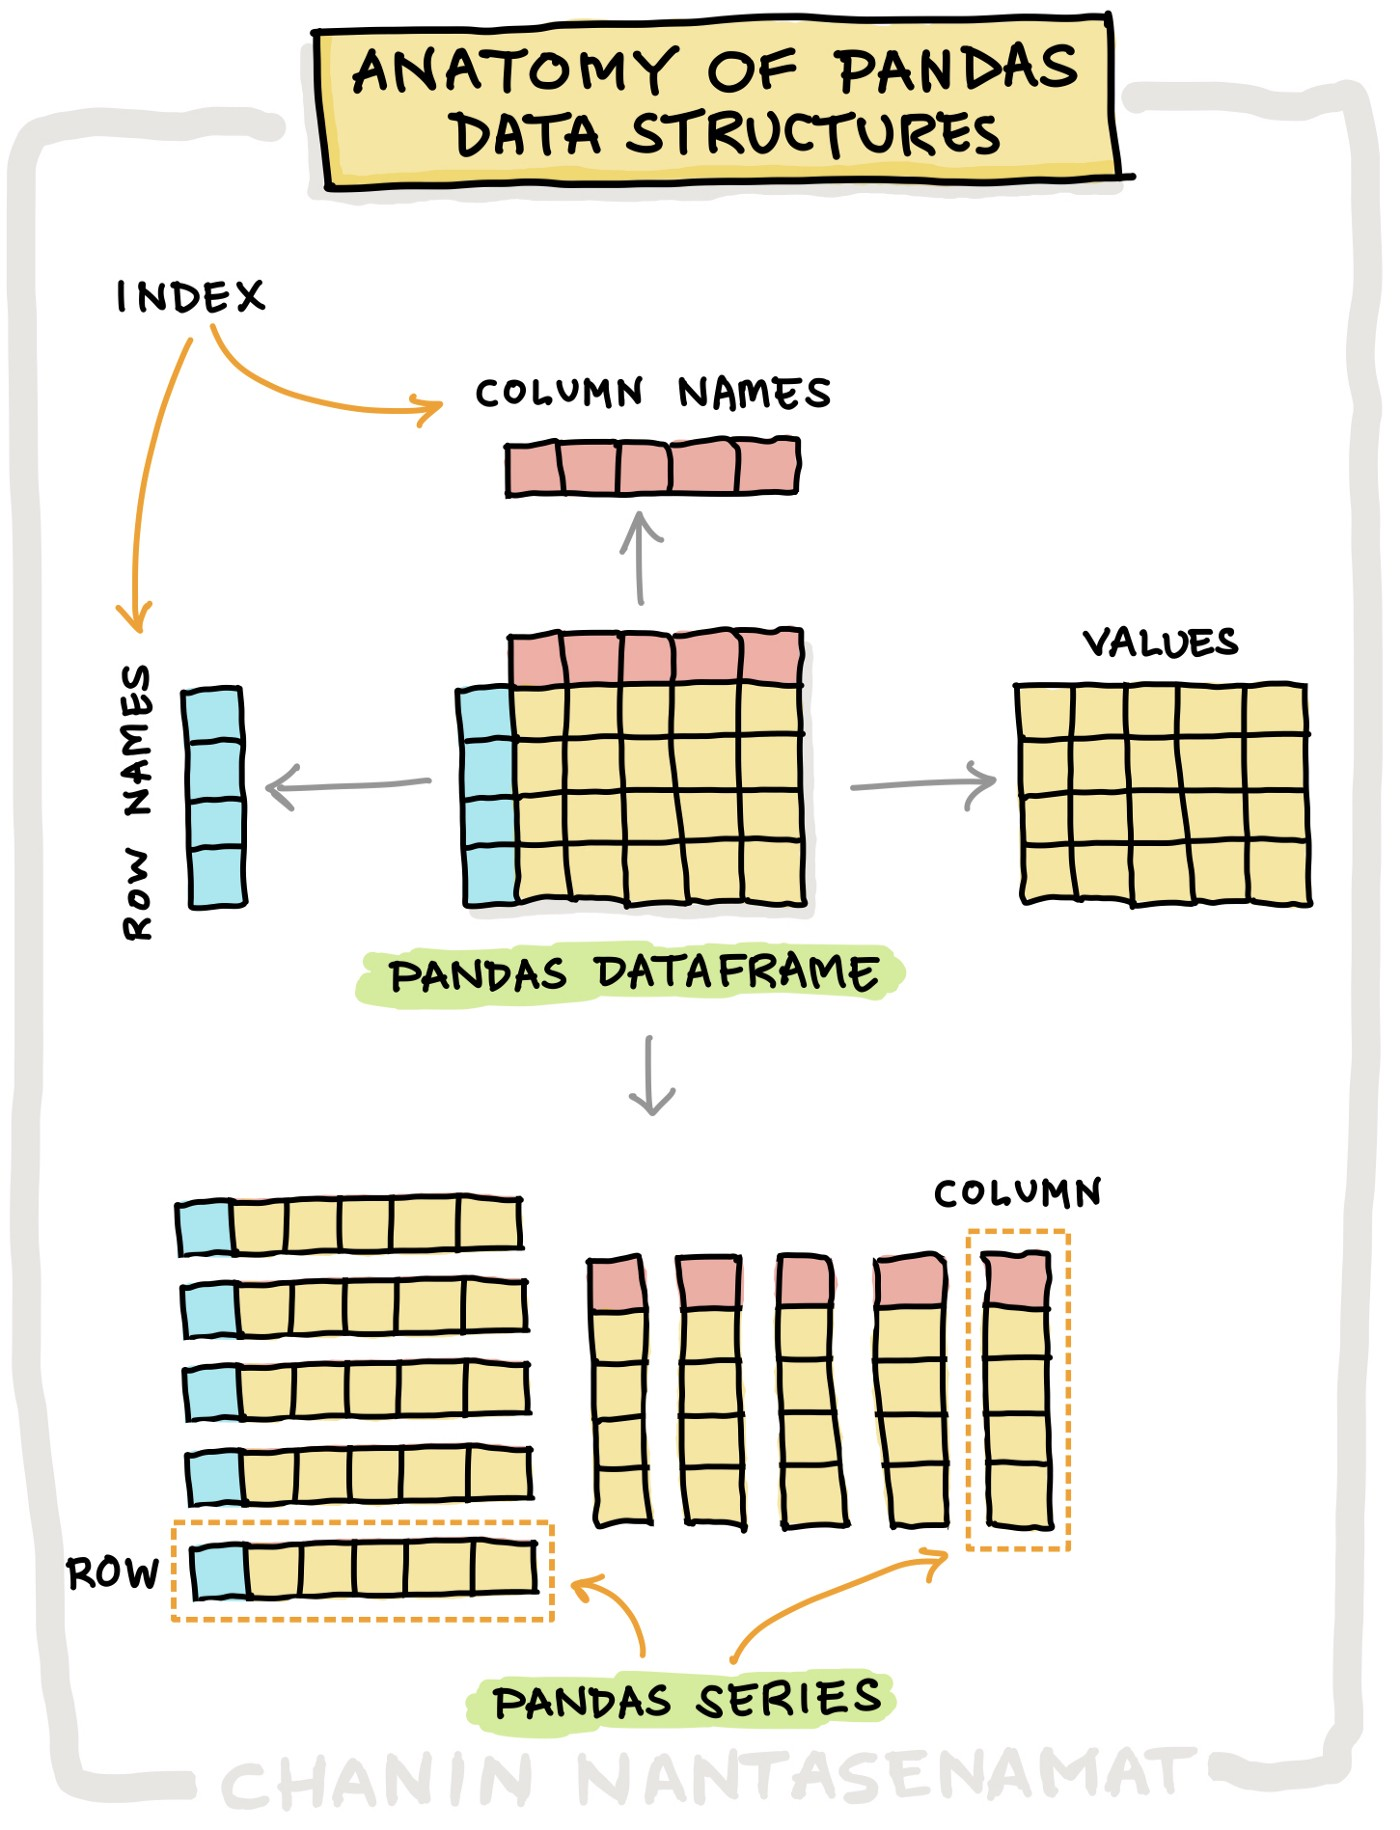


### Reading from a file example
Below we will create a dataframe by reading the file `mouse_cell_metrics.csv` which contains information on different cell types in the mouse. We'll use the `read_csv` function to import our gene expression data as a DataFrame.

>**About this dataset:**
This dataset was curated from data from [The Allen Institute for Brain Science](https://alleninstitute.org/what-we-do/brain-science/). You can play with this data and more [on their website](https://portal.brain-map.org/).  

First, we'll use a package called `urllib` to download the data.

In [ ]:
import urllib.request

data_url = 'https://raw.githubusercontent.com/ajuavinett/CellTypesLesson/master/utilities/mouse_cell_metrics.csv'

data, headers = urllib.request.urlretrieve(data_url, 'cell_data.txt')
# This will download the text file into your Colab environment

In [ ]:
# Read in the list of lists as a data frame
# Note "delimiter" from loadtxt is "sep" here
data_df = pd.read_csv('cell_data.txt',sep=',')

#Show the first five rows
data_df.head()

,cell_surface_area,dendrite_type,rheobase,input_resistance,tau
0,542.046417,aspiny,629.999997,107.630696,5.515311
1,494.036230,aspiny,29.999999,209.605296,62.705039
2,302.248338,aspiny,50.000001,594.843904,10.239005
3,605.346305,aspiny,50.000001,218.831968,45.660687
4,298.096557,spiny,30.000002,338.629120,35.177373


As you can see in the first five rows of the dataset above, this dataset contains observations about the following features:

* (estimated) cell surface area (in µm^2)
* dendrite type (spiny, aspiny, or sparsely spiny)
* rheobase (in nA)
* input resistance (in MOhms)
* tau (in ms)

Each row is a different cell that was recorded and measured.

Below, we'll start manipulating the dataset so that we can see whether these features are related.

### Indexing Dataframes
Similar to a dictionary, we can index dataframes by their names. 

The syntax for indexing single locations in a dataframe is `dataframe.loc[row_label,column_label]`. To index an individual column, we use the shorthand syntax `dataframe.[column_label]`. To index an individual row, we use the syntax `dataframe.loc[row_label]`. To index by index #, we use the syntax `dataframe.iloc[index_number]`. Below are some examples on how to access rows, columns, and single values in our dataframe. For more information on indexing dataframes, visit the <a href = "https://pandas.pydata.org/docs/user_guide/indexing.html#indexing"> "Indexing and selecting data"</a> section in the Pandas User Guide.

In [ ]:
# Select a single column
cell_surface_area = data_df['cell_surface_area']
cell_surface_area

0      542.046417
1      494.036230
2      302.248338
3      605.346305
4      298.096557
          ...    
206    340.474591
207    603.481275
208    449.498683
209    454.638999
210    277.366737
Name: cell_surface_area, Length: 211, dtype: float64

In [ ]:
# Select a single row
data_df.loc[0]

cell_surface_area    542.046417
dendrite_type            aspiny
rheobase             629.999997
input_resistance     107.630696
tau                    5.515311
Name: 0, dtype: object

In [ ]:
# Select an individual value 
data_df.iloc[0,0]

542.0464165551457

To select multiple different columns, you can use a list of all your columns of interest as so:
### Subsetting Dataframes


We can subset our original dataframe to only include data that meets our criteria. Our dataframe has data on multiple different brain areas with many gene expression values. You can filter this dataframe using the following syntax:

new_df = original_df[original_df['Column of Interest'] == 'Desired Value']
In plain english, what this is saying is: save a dataframe from the original dataframe, where the original dataframe values in my Column of Interest are equal to my Desired Value. For more information on subsetting, visit the "How do I select a subset of a DataFrame" section in the Pandas documentation.

In [ ]:
# Create a dataframe with only aspiny neurons
aspiny_cells = data_df[data_df['dendrite_type'] == 'aspiny']
aspiny_cells

,cell_surface_area,dendrite_type,rheobase,input_resistance,tau
0,542.046417,aspiny,629.999997,107.630696,5.515311
1,494.036230,aspiny,29.999999,209.605296,62.705039
2,302.248338,aspiny,50.000001,594.843904,10.239005
3,605.346305,aspiny,50.000001,218.831968,45.660687
5,479.567157,aspiny,190.000002,192.516256,11.871757
...,...,...,...,...,...
204,333.032748,aspiny,370.000000,153.565792,7.551964
205,443.954272,aspiny,70.000000,258.008800,36.373969
207,603.481275,aspiny,150.000000,191.230304,22.133813
209,454.638999,aspiny,30.000002,342.283840,20.173749


### Dataframe Methods
Pandas has many useful methods that you can use on your data, including `describe`, `mean`, and more. To learn more about all the different methods that can be used to manipulate and analyze dataframes, please visit the <a href = "https://pandas.pydata.org/docs/user_guide/index.html"> Pandas User Guide </a>. We will demonstrate some of these methods below. 

In [ ]:
data_df.describe()

,cell_surface_area,rheobase,input_resistance,tau
count,211.000000,211.000000,211.000000,211.000000
mean,496.922279,165.687203,235.102125,15.418434
std,200.701162,134.638411,113.749420,11.271569
min,138.311378,20.000000,84.812208,3.944188
25%,360.111411,69.999999,168.205072,8.092669
50%,478.651560,129.999997,209.605296,11.573595
75%,578.526730,234.999999,268.665464,18.410931
max,1358.917278,800.000011,955.148736,74.898731


> **Task**: Determine whether any two metrics in this data (cell_surface_area, rheobase, input_resistance, or tau) are correlated by plotting them with `plt.scatter(x,y)` where `x` and `y` are your two metrics. Use the [scatter documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) if you need to.

In [ ]:
# Plot your data here

### Numpy


Numpy is most commonly used for arrays. Numpy Arrays are similar to Python lists but have more methods for data analysis.

In [ ]:
# Create a list
lst = [1,2,3,4,5]

# Make our list into an array
my_vector = np.array(lst)
print(type(my_vector))
print(my_vector)

<class 'numpy.ndarray'>
[1 2 3 4 5]



### EEG Analysis with Numpy Arrays



### Data Format
The data sets are stored in comma-separated values (CSV) format. Each row holds information for a single patient and columns represent successive days. The first three rows of our first file look like this:

```
0,0,1,3,1,2,4,7,8,3,3,3,10,5,7,4,7,7,12,18,6,13,11,11,7,7,4,6,8,8,4,4,5,7,3,4,2,3,0,0
0,1,2,1,2,1,3,2,2,6,10,11,5,9,4,4,7,16,8,6,18,4,12,5,12,7,11,5,11,3,3,5,4,4,5,5,1,1,0,1
0,1,1,3,3,2,6,2,5,9,5,7,4,5,4,15,5,11,9,10,19,14,12,17,7,12,11,7,4,2,10,5,4,2,2,3,2,2,1,1
```

**Each number represents the number of inflammation bouts that a particular patient experienced on a given day.** For example, value “6” at row 3 column 7 of the data set above means that the third patient was experiencing inflammation six times on the seventh day of the clinical study.

In [ ]:
data = np.loadtxt(fname='inflammation-01.csv', delimiter=',')

## Analyzing data
NumPy has several useful functions that take an array as input to perform operations on its values. If we want to find the average inflammation for all patients on all days, for example, we can ask NumPy to compute `data`’s mean value. `mean` is a function that takes an array as an argument.

In [ ]:
print(np.mean(data))

5.658333333333333


Let’s use three other NumPy functions to get some descriptive values about the dataset. 

<div class="alert alert-success"> <b>Task</b>: Print the maximum value, minimum value, and standard deviation of data.</div>

In [ ]:
# Max, min, and std here

When analyzing this data, we might want to look at more specific values, such as the maximum inflammation per patient or the average inflammation per day. One way to do this is to create a new temporary array of the data we want, then ask it to do the calculation:

In [ ]:
patient_0 = data[0,: ] # 0 on the first axis (rows), everything on the second (columns)
print('maximum inflammation for patient 0:', np.max(patient_0))

maximum inflammation for patient 0: 18.0


What if we need the maximum inflammation for each patient over all days (as in the next diagram on the left) or the average for each day (as in the diagram on the right)? As the diagram below shows, we want to perform the operation across an axis:

![](Images/python-operations-across-axes.png)

To support this functionality, most array functions allow us to specify the axis we want to work on. If we ask for the average across axis 0 (rows in our 2D example), we get:

In [ ]:
print(np.mean(data, axis=0))

[ 0.          0.66666667  1.33333333  2.33333333  2.          1.66666667
  4.33333333  3.66666667  5.          6.          6.          7.
  6.33333333  6.33333333  5.          7.66666667  6.33333333 11.33333333
  9.66666667 11.33333333 14.33333333 10.33333333 11.66666667 11.
  8.66666667  8.66666667  8.66666667  6.          7.66666667  4.33333333
  5.66666667  4.66666667  4.33333333  4.33333333  3.33333333  4.
  1.66666667  2.          0.33333333  0.66666667]


As a quick check, we can ask this array what its shape is:

In [ ]:
print(np.mean(data, axis=0).shape)

(40,)


The expression `(40,)` tells us we have an N×1 vector, so this is the average inflammation per day for all patients. If we average across axis 1 (columns in our 2D example), we get:

In [ ]:
print(np.mean(data, axis=1))

[5.45  5.425 6.1  ]


which is the average inflammation per patient across all days!

# References
2022 ENDURE Python for Neuroscientist Workshop - Dr. Ashley Juavinett
https://github.com/STARTneuro/ENDURE2022


